In [1]:
#Import needed library.
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('SPUF.DATA.csv',delimiter=',',header='infer')

In [3]:
# Delete data with no driving
df = df[df['GPS_DISTANCE'] !=0]
# Date
df['WEEKDAY'] = pd.DatetimeIndex(df['DATE']).weekday
df['MONTH'] = pd.DatetimeIndex(df['DATE']).month
df['YEAR'] = pd.DatetimeIndex(df['DATE']).year
# Supplement missing data
df['CARGO_WEIGHT'] = df['CARGO_WEIGHT'].fillna((df['CARGO_WEIGHT'].mean()))

In [4]:
df['START_MILEAGE'] = df['START_MILEAGE'].replace(' ','')
df["START_MILEAGE"] = df['START_MILEAGE'].astype(float)

In [5]:
# Separate features and labels
X, y = df[['WEEKDAY','MONTH','YEAR','GPS_DISTANCE','START_MILEAGE','CARGO_WEIGHT','DRIVER_ID','DRIVER_YEAR_BORN','TRUCK_ID',
'TRUCK_YEAR_PRODUCTION','KW','TRUCK_WEIGHT','MAX_TRUCK_TOTALWEIGHT','START_PLACE_ID','END_PLACE_ID','QTY_DRIVERS'
]].values, df['USED_FUEL'].values

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 1257 rows
Test Set: 540 rows


LinearRegression() 

MSE: 560.6711741693533
RMSE: 23.678496028450652
R2: 0.8520464466863146


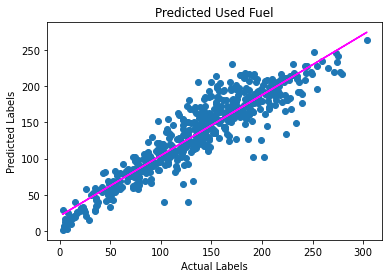

In [7]:
from sklearn import linear_model

# Train the model
model = linear_model.LinearRegression().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predicted Used Fuel')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [8]:
import joblib

# Save the model as a pickle file
filename = 'SPUF_LinearRegression.pkl'
joblib.dump(model, filename)

['SPUF_LinearRegression.pkl']

C:\Anaconda 15.06.2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.59293e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Ridge() 

MSE: 560.6829507198901
RMSE: 23.678744703211994
R2: 0.8520433390136216


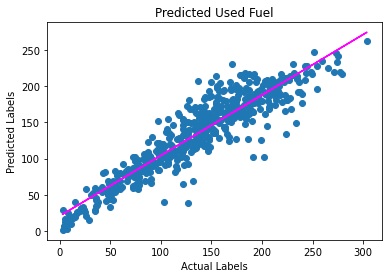

In [9]:
from sklearn import linear_model

# Train the model
model = linear_model.Ridge().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predicted Used Fuel')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [10]:
import joblib

# Save the model as a pickle file
filename = 'SPUF_Ridge.pkl'
joblib.dump(model, filename)

['SPUF_Ridge.pkl']

ElasticNet() 

MSE: 580.556084048832
RMSE: 24.09473145832574
R2: 0.8467990874327378


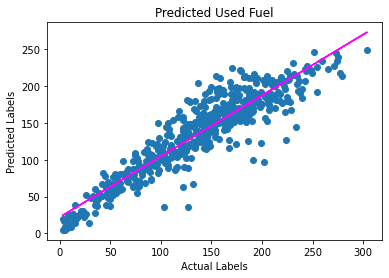

In [11]:
from sklearn import linear_model

# Train the model
model = linear_model.ElasticNet().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predicted Used Fuel')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [12]:
import joblib

# Save the model as a pickle file
filename = 'SPUF_ElasticNet.pkl'
joblib.dump(model, filename)

['SPUF_ElasticNet.pkl']

Lars() 

MSE: 563.3317140497002
RMSE: 23.734610046295266
R2: 0.8513443661314987


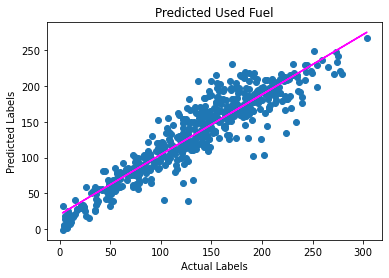

In [13]:
from sklearn import linear_model

# Train the model
model = linear_model.Lars().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predicted Used Fuel')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [14]:
import joblib

# Save the model as a pickle file
filename = 'SPUF_Lars.pkl'
joblib.dump(model, filename)

['SPUF_Lars.pkl']

Lasso() 

MSE: 578.6444815692078
RMSE: 24.055030275790713
R2: 0.8473035335188108


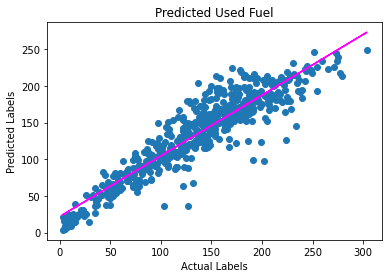

In [15]:
from sklearn import linear_model

# Train the model
model = linear_model.Lasso().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)


# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predicted Used Fuel')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [16]:
import joblib

# Save the model as a pickle file
filename = 'SPUF_Lasso.pkl'
joblib.dump(model, filename)

['SPUF_Lasso.pkl']

LassoLars() 

MSE: 2062.2417683938584
RMSE: 45.41191218605376
R2: 0.45580223938245845


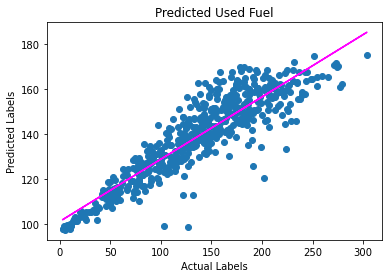

In [17]:
from sklearn import linear_model

# Train the model
model = linear_model.LassoLars().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predicted Used Fuel')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [18]:
import joblib

# Save the model as a pickle file
filename = 'SPUF_LassoLars.pkl'
joblib.dump(model, filename)

['SPUF_LassoLars.pkl']

LassoLarsIC() 

MSE: 567.8656702651773
RMSE: 23.82993223375126
R2: 0.8501479162985957


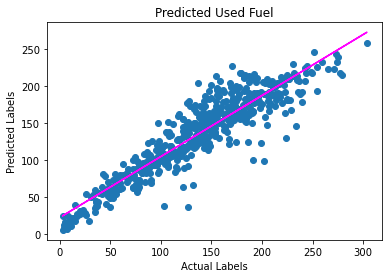

In [19]:
from sklearn import linear_model

# Train the model
model = linear_model.LassoLarsIC().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predicted Used Fuel')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [20]:
import joblib

# Save the model as a pickle file
filename = 'SPUF_LassoLarsIC.pkl'
joblib.dump(model, filename)

['SPUF_LassoLarsIC.pkl']

OrthogonalMatchingPursuit() 

MSE: 716.0282751985117
RMSE: 26.75870466219379
R2: 0.8110498051810136


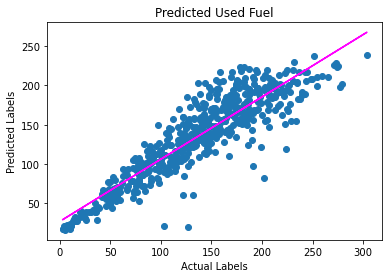

In [21]:
from sklearn import linear_model

# Train the model
model = linear_model.OrthogonalMatchingPursuit().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predicted Used Fuel')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [22]:
import joblib

# Save the model as a pickle file
filename = 'SPUF_OrthogonalMatchingPursuit.pkl'
joblib.dump(model, filename)

['SPUF_OrthogonalMatchingPursuit.pkl']

OrthogonalMatchingPursuitCV() 

MSE: 605.1221363658016
RMSE: 24.59923040190082
R2: 0.8403164378894109


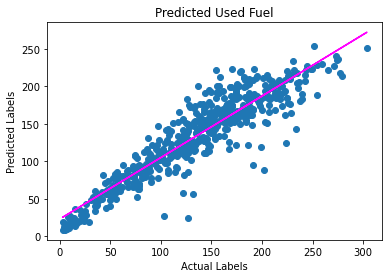

In [23]:
from sklearn import linear_model

# Train the model
model = linear_model.OrthogonalMatchingPursuitCV().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predicted Used Fuel')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [24]:
import joblib

# Save the model as a pickle file
filename = 'SPUF_OrthogonalMatchingPursuitCV.pkl'
joblib.dump(model, filename)

['SPUF_OrthogonalMatchingPursuitCV.pkl']

ARDRegression() 

MSE: 716.0538210646047
RMSE: 26.759181995431113
R2: 0.811043063971843


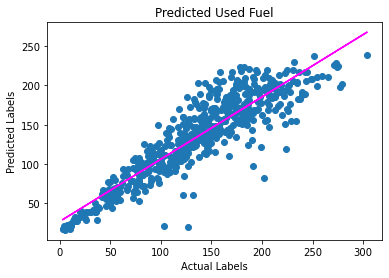

In [25]:
from sklearn import linear_model

# Train the model
model = linear_model.ARDRegression().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predicted Used Fuel')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [26]:
import joblib

# Save the model as a pickle file
filename = 'SPUF_ARDRegression.pkl'
joblib.dump(model, filename)

['SPUF_ARDRegression.pkl']

BayesianRidge() 

MSE: 585.7580167680737
RMSE: 24.20243824014584
R2: 0.8454263676187563


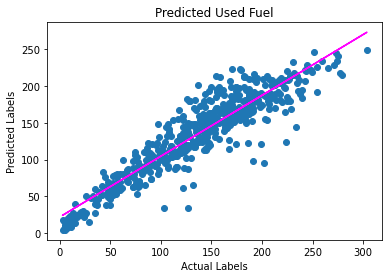

In [27]:
from sklearn import linear_model

# Train the model
model = linear_model.BayesianRidge().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predicted Used Fuel')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [28]:
import joblib

# Save the model as a pickle file
filename = 'SPUF_BayesianRidge.pkl'
joblib.dump(model, filename)

['SPUF_BayesianRidge.pkl']

RANSACRegressor() 

MSE: 586.9224433768329
RMSE: 24.226482274090742
R2: 0.8451190911574791


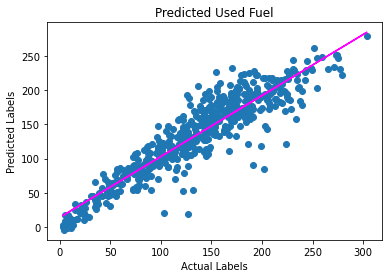

In [29]:
from sklearn import linear_model

# Train the model
model = linear_model.RANSACRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predicted Used Fuel')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [30]:
import joblib

# Save the model as a pickle file
filename = 'SPUF_RANSACRegressor.pkl'
joblib.dump(model, filename)

['SPUF_RANSACRegressor.pkl']

C:\Anaconda 15.06.2021\lib\site-packages\sklearn\linear_model\_glm\glm.py:287: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


TweedieRegressor() 

MSE: 936.2123804940026
RMSE: 30.597587821493423
R2: 0.7529461924708967


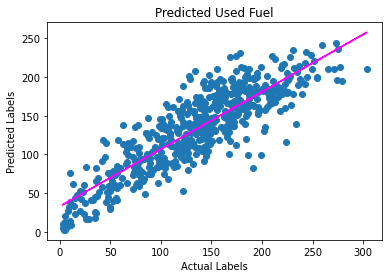

In [31]:
from sklearn import linear_model

# Train the model
model = linear_model.TweedieRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predicted Used Fuel')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [32]:
import joblib

# Save the model as a pickle file
filename = 'SPUF_TweedieRegressor.pkl'
joblib.dump(model, filename)

['SPUF_TweedieRegressor.pkl']